In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from model.inference import HandPoseEstimationInference
from io_ import get_model_file

inference = HandPoseEstimationInference(
    model_fp=get_model_file()
)

inference

INFO: Loading the model


HandPoseEstimationInference [1560 items]

In [3]:
hand = inference[0]

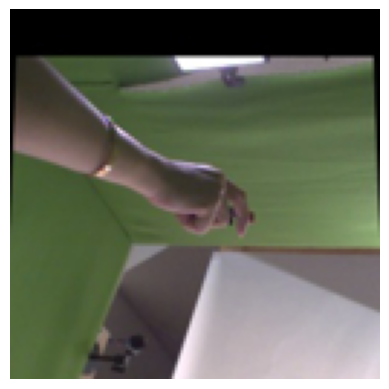

In [4]:
hand.plot_image()

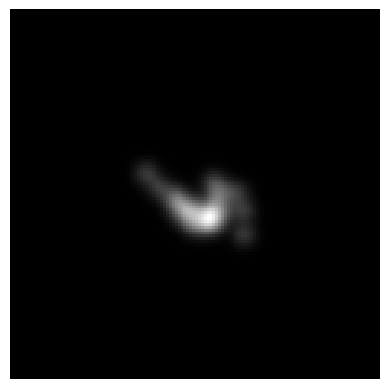

In [7]:
hand.plot_heatmaps()

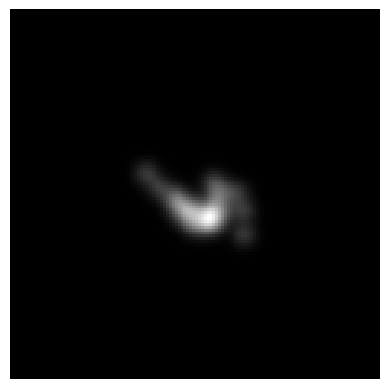

In [11]:
hand.plot_pred_heatmaps()